In [143]:
#import the usefull libreries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
#export the data cleaned
df = pd.read_csv('inmuebles24-data-cleaned.csv')

In [145]:
#options for diplay max columns
#pd.set_option('display.max_rows',df.shape[0]+1)
pd.set_option('display.max_rows',20)

In [146]:
#let's look a preview of our data
df.head()

,name,location,link,rooms,bathrooms,construction (m2),terrain (m2),divisa,price MP,Delegacion,colonia,gym,pool,pet,garage,elevador,terrace,garden
0,"Sierra Gorda, Lomas de Chapultepec","Calle Sierra gorda, Lomas de Chapultepec, Migu...",/propiedades/sierra-gorda-lomas-de-chapultepec...,2.5,2.0,282.0,416.5,1,25.000000,Miguel Hidalgo,Lomas de Chapultepec,0,0,0,0,0,0,1
1,Enquentro Residencial Insurgentes Mixcoac,"Patriotismo 883, Insurgentes Mixcoac, Benito J...",/propiedades/enquentro-residencial-insurgentes...,2.5,2.0,140.5,140.5,1,5.523587,Benito Juárez,Insurgentes Mixcoac,1,1,1,1,1,1,1
2,Sky Tower Lindavista,"Av. Insurgentes Norte. 1346, Lindavista, Ciud...",/propiedades/sky-tower-lindavista-54456938.html,2.0,2.0,79.5,122.0,1,3.210000,Gustavo A. Madero,Lindavista,1,0,0,1,0,0,0
3,Único Coyocán,"Av. Popocatepetl 164,, Narvarte, Benito Juárez",/propiedades/unico-coyocan-52835008.html,2.0,2.0,107.5,107.5,1,3.472000,Benito Juárez,Narvarte,0,0,1,0,0,1,1
4,Departamentos Icon Beyond Gdc,"Blvd. Adolfo López Mateos 1977, San Angel, Alv...",/propiedades/departamentos-icon-beyond-gdc-541...,2.0,2.0,129.0,129.0,1,5.045115,Alvaro Obregón,San Angel,0,0,0,0,0,0,0


In [147]:
#disflay info from data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20009 entries, 0 to 20008
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               20009 non-null  object 
 1   location           20009 non-null  object 
 2   link               20009 non-null  object 
 3   rooms              20009 non-null  float64
 4   bathrooms          20009 non-null  float64
 5   construction (m2)  20009 non-null  float64
 6   terrain (m2)       20009 non-null  float64
 7   divisa             20009 non-null  int64  
 8   price MP           20009 non-null  float64
 9   Delegacion         20009 non-null  object 
 10  colonia            20009 non-null  object 
 11  gym                20009 non-null  int64  
 12  pool               20009 non-null  int64  
 13  pet                20009 non-null  int64  
 14  garage             20009 non-null  int64  
 15  elevador           20009 non-null  int64  
 16  terrace            200

In [148]:
#count rows and columns
df.shape

(20009, 18)

In [149]:
#a vrief stat
df.describe()

,rooms,bathrooms,construction (m2),terrain (m2),divisa,price MP,gym,pool,pet,garage,elevador,terrace,garden
count,20009.000000,20009.000000,2.000900e+04,2.000900e+04,20009.000000,20009.000000,20009.000000,20009.000000,20009.000000,20009.000000,20009.000000,20009.000000,20009.000000
mean,2.388575,2.071518,2.492539e+02,5.696881e+02,0.927483,10.410225,0.277525,0.178969,0.060723,0.652306,0.265181,0.260533,0.299165
std,0.782781,0.821440,1.181541e+04,2.690536e+04,0.259349,41.672780,0.447789,0.383336,0.238827,0.476250,0.441440,0.438936,0.457904
min,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,7.600000e+01,7.900000e+01,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.100000e+02,1.150000e+02,1.000000,5.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,1.830000e+02,1.920000e+02,1.000000,10.507115,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,40.000000,22.000000,1.670000e+06,2.900000e+06,1.000000,3150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
#les's clean more the data and consider a aceptable value for rooms, baths, construction and terrain
df['rooms'] = df['rooms'].replace(0, 2)
df['bathrooms'] = df['bathrooms'].replace(0,2)
df = df[df['rooms']<6]
df = df[df['bathrooms']<6]
df = df[df['construction (m2)']<1200]
df = df[df['construction (m2)']>29]
df = df[df['terrain (m2)']<1500]
df = df[df['terrain (m2)']>29]
#lets consider a better range of prices 
df = df[df['price MP'] < 130]
df = df[df['price MP'] > 0.3]
#a vrief stat
df.describe()

,rooms,bathrooms,construction (m2),terrain (m2),divisa,price MP,gym,pool,pet,garage,elevador,terrace,garden
count,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000,19786.000000
mean,2.404048,2.079147,150.342085,157.205827,0.928384,9.135421,0.277216,0.178813,0.060649,0.654806,0.266047,0.261195,0.300212
std,0.627907,0.772540,111.773844,121.372701,0.257858,11.639697,0.447635,0.383206,0.238691,0.475443,0.441900,0.439297,0.458362
min,1.000000,1.000000,30.000000,30.000000,0.000000,0.305100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,77.000000,79.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,110.000000,115.000000,1.000000,5.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,182.000000,190.000000,1.000000,10.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,1165.000000,1400.000000,1.000000,129.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
#a look at appartments per delegacion
df.Delegacion.value_counts()

 Benito Juárez             5003
 Miguel Hidalgo            4279
 Cuauhtémoc                2647
 Alvaro Obregón            2312
 Cuajimalpa de Morelos     2271
 Coyoacán                   740
 Tlalpan                    654
 Azcapotzalco               343
 Distrito Federal           314
 Gustavo A. Madero          287
 Venustiano Carranza        263
 Iztapalapa                 240
 Iztacalco                  198
 La Magdalena Contreras     143
 Tláhuac                     44
 Xochimilco                  43
 otra                         5
Name: Delegacion, dtype: int64

In [152]:
#delete delegacion 'Distrito Federal' because its all te city
df = df[~df.Delegacion.str.contains('Distrito')]

In [153]:
#lets see the max prices per delegacion
df[df.Delegacion.str.contains('Xochimilco')].sort_values(by=['price MP']).head()

,name,location,link,rooms,bathrooms,construction (m2),terrain (m2),divisa,price MP,Delegacion,colonia,gym,pool,pet,garage,elevador,terrace,garden
10338,Oportunidad Dpto a Precio de Remate Col Nativitas,"Nativitas, Xochimilco",/propiedades/oportunidad-dpto-a-precio-de-rema...,2.0,1.0,83.0,83.0,1,0.413149,Xochimilco,Nativitas,0,0,0,0,0,0,0
12081,Excelente Oportunidad de Inversion Departament...,"Santiago Tepalcatlalpan, Xochimilco",/propiedades/excelente-oportunidad-de-inversio...,2.0,1.0,60.0,60.0,1,0.450000,Xochimilco,Santiago Tepalcatlalpan,0,0,0,0,0,0,0
11597,Excelente Inversión Departamento en Delegación...,"Ampliación Tepepan, Xochimilco",/propiedades/excelente-inversion-departamento-...,2.0,1.0,70.0,70.0,1,0.574082,Xochimilco,Ampliación Tepepan,0,0,0,0,0,0,0
11616,Excelente Oportunidad de Inversion Depto en Ac...,"Ampliación Tepepan, Xochimilco",/propiedades/excelente-oportunidad-de-inversio...,2.0,1.0,55.0,55.0,1,0.589082,Xochimilco,Ampliación Tepepan,0,0,0,0,0,0,0
6879,Depto de Remate Bancario La Noria Xochimilco,"La Noria, Xochimilco",/propiedades/depto-de-remate-bancario-la-noria...,3.0,2.0,80.0,80.0,1,0.866000,Xochimilco,La Noria,0,0,0,0,0,0,0


In [154]:
#let's count dep for each delegacion again
df.Delegacion.value_counts()

 Benito Juárez             5003
 Miguel Hidalgo            4279
 Cuauhtémoc                2647
 Alvaro Obregón            2312
 Cuajimalpa de Morelos     2271
 Coyoacán                   740
 Tlalpan                    654
 Azcapotzalco               343
 Gustavo A. Madero          287
 Venustiano Carranza        263
 Iztapalapa                 240
 Iztacalco                  198
 La Magdalena Contreras     143
 Tláhuac                     44
 Xochimilco                  43
 otra                         5
Name: Delegacion, dtype: int64

In [155]:
#delete the spaces from colonia to get better centain
df['colonia'] = df['colonia'].apply(lambda x: x.replace(' ', ''))

In [156]:
#a look at appm per colonia
df.colonia.value_counts().head()

Polanco              1765
DelValle             1370
Narvarte              839
BosquesdelasLomas     778
Portales              492
Name: colonia, dtype: int64

In [157]:
#lets considere only the colonias that have more than 10 apts 
df =  df[~df.colonia.isin(df.colonia.value_counts().loc[lambda x: x < 10].index)]

In [158]:
#a look at appm per colonia
df.colonia.value_counts()

Polanco                1765
DelValle               1370
Narvarte                839
BosquesdelasLomas       778
Portales                492
                       ... 
LomasdeSotelo            10
SanBartoloAmeyalco       10
LomasdePlateros          10
SantaFeCentroCiudad      10
Petrolera                10
Name: colonia, Length: 227, dtype: int64

In [159]:
#we finished with our data cleaned lest export it 
df.to_csv('data-eda.csv',index = False)

In [160]:
#we finished with our data cleaned
#look at the correlation between the numerical data
df[['rooms','bathrooms', 'construction (m2)','terrain (m2)', 'price MP']].corr()

,rooms,bathrooms,construction (m2),terrain (m2),price MP
rooms,1.000000,0.587729,0.515673,0.483143,0.336272
bathrooms,0.587729,1.000000,0.659550,0.603671,0.532655
construction (m2),0.515673,0.659550,1.000000,0.906929,0.797283
terrain (m2),0.483143,0.603671,0.906929,1.000000,0.735728
price MP,0.336272,0.532655,0.797283,0.735728,1.000000


<AxesSubplot:>

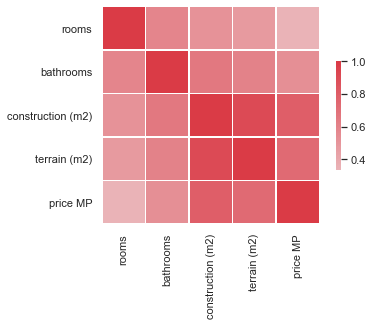

In [161]:
#we make a representative matrix
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['rooms','bathrooms', 'construction (m2)','terrain (m2)', 'price MP']].corr(), vmax=1,center=0,
            cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

<AxesSubplot:>

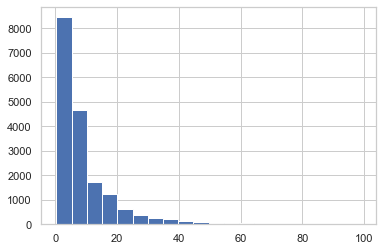

In [162]:
df[df['price MP']<100]['price MP'].hist(bins=20)

In [163]:
#make a data frame with categorical data
df_cat = df[['Delegacion', 'colonia', 'gym',
       'pool', 'pet', 'garage', 'elevador', 'terrace', 'garden']]

graph for Delegacion: total = 15


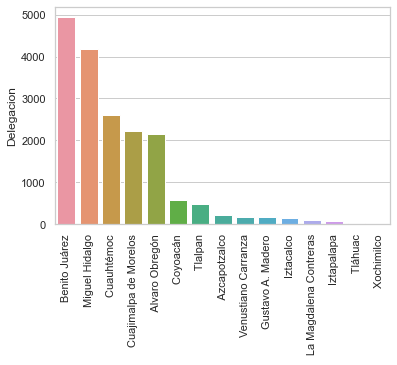

graph for colonia: total = 227


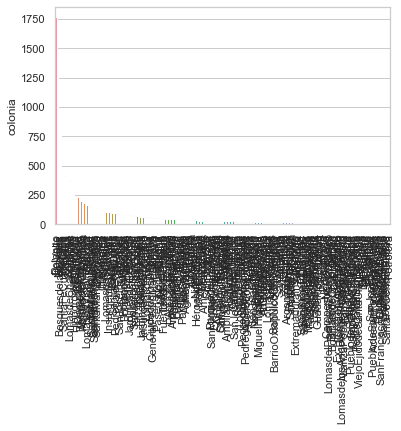

graph for gym: total = 2


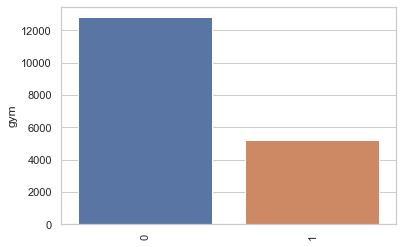

graph for pool: total = 2


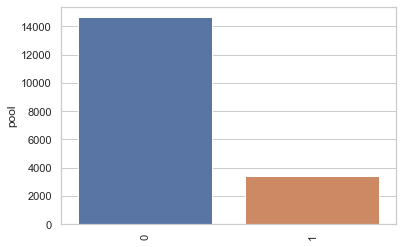

graph for pet: total = 2


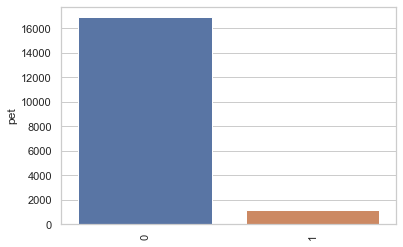

graph for garage: total = 2


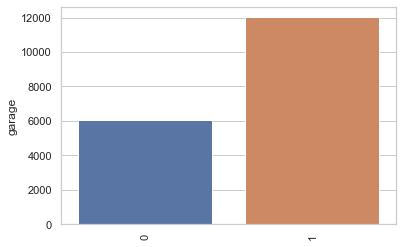

graph for elevador: total = 2


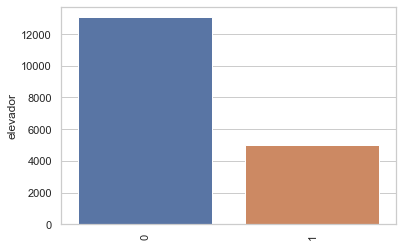

graph for terrace: total = 2


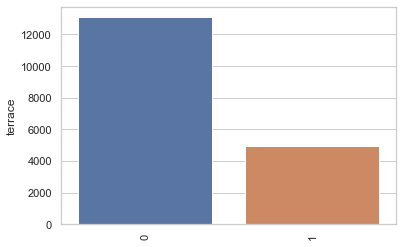

graph for garden: total = 2


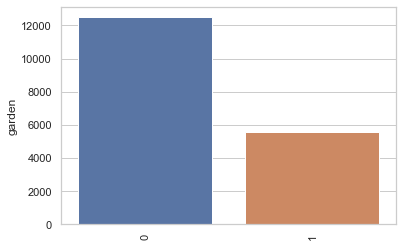

In [164]:
#make a barplot of numbers of apartments in each category
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

In [165]:
#pivotable to see the prices in each delegacion
pd.pivot_table(df, index = ['Delegacion','colonia'], values = 'price MP')

price MP
Delegacion           colonia                       
 Alvaro Obregón      Alcantarilla          5.498805
                     AlfonsoXIII           1.930185
                     AmpliaciónAlpes       9.984939
                     AmpliaciónLasAguilas  4.572065
                     Bellavista            1.413347
...                                             ...
 Venustiano Carranza Morelos               0.600472
                     NicolásBravo          1.165809
                     PopularRastro         1.312277
                     ValleGómez            1.300405
 Xochimilco          Nativitas             0.413149

[244 rows x 1 columns]

In [166]:
#pivots to see the average price for each category
df_pivots = df[['rooms', 'bathrooms', 'Delegacion', 'colonia', 'gym',
       'pool', 'pet', 'garage', 'elevador', 'terrace', 'garden', 'price MP']]

In [167]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'price MP'))#.sort_values('price MP', ascending=False)

rooms
        price MP
rooms           
1.0     4.702140
1.5     3.505934
2.0     6.572537
2.5    10.141431
3.0    12.898698
4.0    28.202160
5.0    16.145481
bathrooms
            price MP
bathrooms           
1.0         2.526253
2.0         7.235097
3.0        18.175608
4.0        26.514218
5.0        35.618570
Delegacion
                          price MP
Delegacion                        
 Alvaro Obregón           8.296354
 Azcapotzalco             1.816745
 Benito Juárez            4.666349
 Coyoacán                 3.762734
 Cuajimalpa de Morelos   16.671466
 Cuauhtémoc               5.716832
 Gustavo A. Madero        1.874416
 Iztacalco                1.424213
 Iztapalapa               0.803726
 La Magdalena Contreras   6.769095
 Miguel Hidalgo          17.491258
 Tlalpan                  7.040379
 Tláhuac                  0.560929
 Venustiano Carranza      1.273255
 Xochimilco               0.413149
colonia
                              price MP
colonia                        

ValueError: Grouper for 'price MP' not 1-dimensional

In [168]:
#a look at median price per delegacio
pricepd = df.groupby('Delegacion', as_index=False)['price MP'].median()
pricepd = pricepd.sort_values(by=['price MP'], ascending=False)
pricepd

,Delegacion,price MP
10,Miguel Hidalgo,14.000000
4,Cuajimalpa de Morelos,12.900000
9,La Magdalena Contreras,6.000000
0,Alvaro Obregón,5.750000
5,Cuauhtémoc,5.149000
11,Tlalpan,4.400000
2,Benito Juárez,4.350000
3,Coyoacán,3.090000
1,Azcapotzalco,1.800000
6,Gustavo A. Madero,1.690000


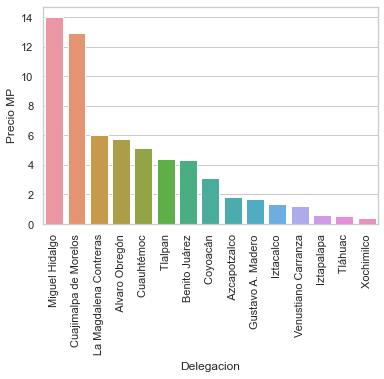

In [169]:
#a graph of the mean price per delegacion
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = pricepd['Delegacion'], y=pricepd['price MP'])
plt.ylabel('Precio MP')
plt.xticks(rotation=90)
plt.savefig('pricepd.png', dpi=300, bbox_inches='tight')

In [170]:
#price by colonia
pricepc = df.groupby('colonia', as_index=False)['price MP'].median()
pricepc.sort_values(by=['price MP'],ascending=False)

,colonia,price MP
99,LomasAltas,55.935000
42,ClubdeGolfBosques,55.000000
106,LomasdeReforma,33.000000
32,BosquesdeChapultepec,30.800000
186,SanMateoTlaltenango,25.500000
...,...,...
188,SanNicolásTolentino,0.615658
165,PradosdelRosario,0.582376
94,LaPreciosa,0.556433
119,LosOlivos,0.520920


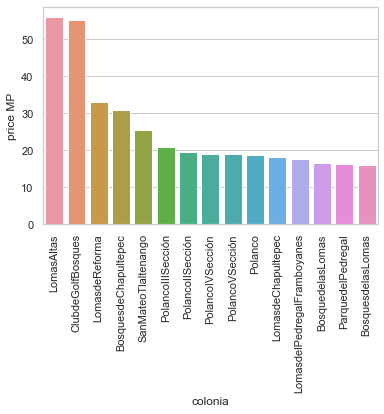

In [171]:
#plot of the more expensive colonias 
sns.barplot(x = pricepc.nlargest(15, 'price MP')['colonia'], 
            y = pricepc.nlargest(15, 'price MP')['price MP'])
plt.xticks(rotation=90)
plt.savefig('pricebcnl.png', dpi=300, bbox_inches='tight')

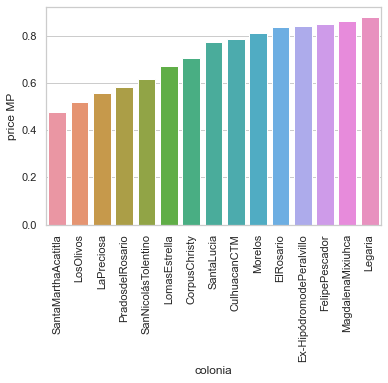

In [172]:
sns.barplot(x = pricepc.nsmallest(15, 'price MP')['colonia'], 
            y = pricepc.nsmallest(15, 'price MP')['price MP'])
plt.xticks(rotation=90)
plt.savefig('pricebcns.png', dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='construction (m2)', ylabel='price MP'>

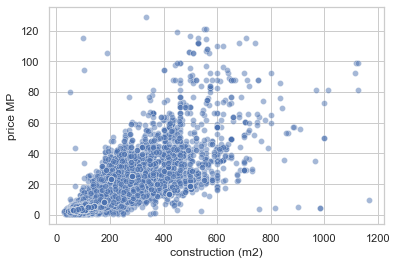

In [173]:
sns.scatterplot(x=df['construction (m2)'], y=df['price MP'], alpha=0.5)